In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def U(q):
    return (q - 3.0)**2

def grad_U(q):
    return 2*(q - 3.0)

In [48]:
def HMC(epsilon, L, current_q):
    q = current_q
    p = 0.1*np.random.normal(0.0)
    current_p = p
    
    # Make a half step for momentum
    
    p += -epsilon*grad_U(q)/2
    
    # Alternate full steps for position and momentum
    
    for i in range(L):
        
        # Make a full step for the position
        
        q += epsilon*p
        
        # Make a full step for momentum, except at end of trajectory
        
        if i != L-1:
            
            p += -epsilon*grad_U(q)
            
    # Make a half step for momentum at the end
    
    p += -epsilon*grad_U(q)/2
    
    current_U = U(current_q)
    current_K = current_p**2 / 2
    proposed_U = U(q)
    proposed_K = current_p**2 / 2
    
    # Accept or reject the state at end of trajectory, returning either
    # the position at the end of the trajectory or the initial position
    if (np.random.uniform() < np.exp(current_U-proposed_U+current_K-proposed_K)):
        
        return q #accept
    
    else:
        return current_q # reject



In [49]:
q = np.random.normal(3.0)
sampled_values = []
energies = []

print(q)

1.3270191986272228


In [50]:
for i in range(10000):
    q = HMC(1e-2, 25, q)
    energies.append(U(q))
    sampled_values.append(q)

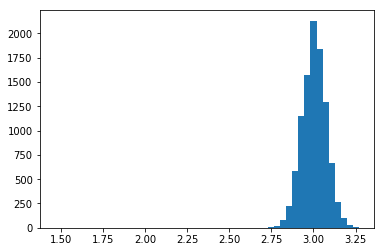

In [51]:
plt.hist(sampled_values, bins = 50)
plt.show()

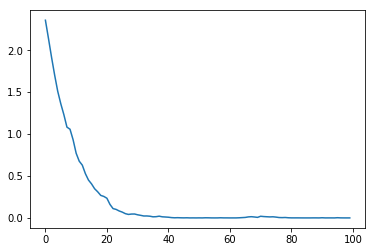

In [61]:
#plt.hist(energies,range = [-0.1,0.1], bins = 50)
plt.plot(energies[:100])
plt.show()